# Pneumonia Detection with Convolutional Neural Networks

Ioanna Polychronou 0031 <br>
AIDL_02 

### AI for Medical Diagnosis
Computer Vision (CV) has a lot of applications in medical diagnosis, that is Dermatology, Ophthakmology, Histopathology.

X-rays images are critical for the detection of lung cancer, pneumenia etc

### Computer Vision

**Computer vision** is an interdisciplinary scientific field that deals with how computers can gain high-level understanding from digital images or videos. From the perspective of engineering, it seeks to understand and automate tasks that the human visual system can do.
**Computer vision** tasks include methods for acquiring, processing, analyzing and understanding digital images, and extraction of high-dimensional data from the real world in order to produce numerical or symbolic information, e.g. in the forms of decisions. Understanding in this context means the transformation of visual images (the input of the retina) into descriptions of the world that make sense to thought processes and can elicit appropriate action. This image understanding can be seen as the disentangling of symbolic information from image data using models constructed with the aid of geometry, physics, statistics, and learning theory.
[ref](https://en.wikipedia.org/wiki/Computer_vision)

### What is Pneumonia?
From [hopkinsmedicine.org](https://www.hopkinsmedicine.org/health/conditions-and-diseases/pneumonia)

Pneumonia is an infection of one or both of the lungs caused by bacteria, viruses, or fungi. It is a serious infection in which the air sacs fill with pus and other liquid.

*   Lobar pneumonia affects one or more sections (lobes) of the lungs.
*   Bronchial pneumonia (also known as bronchopneumonia) affects patches throughout both lungs.

**Diagnosis** is usually made based on your recent health history (such as surgery, a cold, or travel exposures) and the extent of the illness. Based on these factors, your healthcare provider may diagnose pneumonia simply on a thorough history and physical exam. The following tests may be used to confirm the diagnosis:


*   Chest X-ray
*   Blood tests
*   Sputum culture
*   Pulse oximetry
*   Chest CT scan
*   Bronchoscopy
*   Pleural fluid culture

###  Import Packages and Functions

In [1]:
# Google Drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Kaggle & Colab installation 
! pip install -q kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
# Download data from kaggle
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [4]:
# Install tensorflow 2.2.0
!pip uninstall tensorflow --y
!pip install tensorflow==2.2.0

Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 516.2 MB 4.0 kB/s 
     |████████████████████████████████| 454 kB 65.1 MB/s 
     |████████████████████████████████| 2.9 MB 20.1 MB/s 
     |████████████████████████████████| 3.0 MB 32.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1

In [7]:
# Import basic libraries
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [8]:
# main path
os.listdir("chest_xray")

['val', 'chest_xray', 'train', 'test', '__MACOSX']

The dataset is divided into three sets: 

1. Train set
2. Validation set
3. Test set

In [9]:
# Main data dir 
train_dir = "chest_xray/chest_xray/train"
test_dir = "chest_xray/chest_xray/test"
val_dir = "chest_xray/chest_xray/val"

### Pneumoia

In [10]:
# train 
pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')
pneumonia = os.listdir(pneumonia_dir)
print(f"Train set: PNEUMONIA={len(pneumonia)}")

#test
test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')
test_pneumonia = os.listdir(test_pneumonia_dir)
print(f"Test set: PNEUMONIA={len(test_pneumonia)}")

#val
val_pneumonia_dir = os.path.join(val_dir, 'PNEUMONIA')
val_pneumonia = os.listdir(val_pneumonia_dir)
print(f"Validation set: PNEUMONIA={len(val_pneumonia)}")

Train set: PNEUMONIA=3876
Test set: PNEUMONIA=390
Validation set: PNEUMONIA=9


### Normal

In [11]:
# train 
normal_dir = os.path.join(train_dir, 'NORMAL')
normal = os.listdir(normal_dir)
print(f"Train set: NORMAL={len(normal)}")

#test
test_normal_dir = os.path.join(test_dir, 'NORMAL')
test_normal = os.listdir(test_normal_dir)
print(f"Test set: NORMAL={len(test_normal)}")

#val
val_normal_dir = os.path.join(val_dir, 'NORMAL')
val_normal = os.listdir(val_normal_dir)
print(f"Validation set: NORMAL={len(val_normal)}")

Train set: NORMAL=1342
Test set: NORMAL=234
Validation set: NORMAL=9


### Plot data length

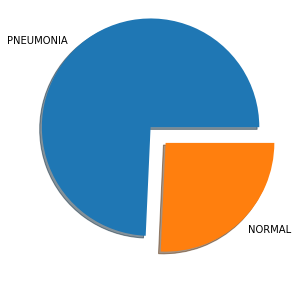

In [ ]:
plt.figure(figsize=(20,10))

plt.pie(np.array([len(pneumonia), len(normal)]), labels = ['PNEUMONIA', 'NORMAL'], explode=[0.2, 0], shadow = True)
plt.show()

<BarContainer object of 2 artists>

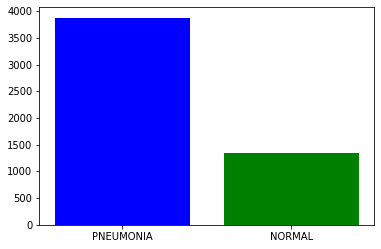

In [ ]:
plt.bar(["PNEUMONIA","NORMAL"], [len(pneumonia),len(normal)],
        color=['blue', 'green'], width = 0.8)

### Data Visualization


### Pneumonia

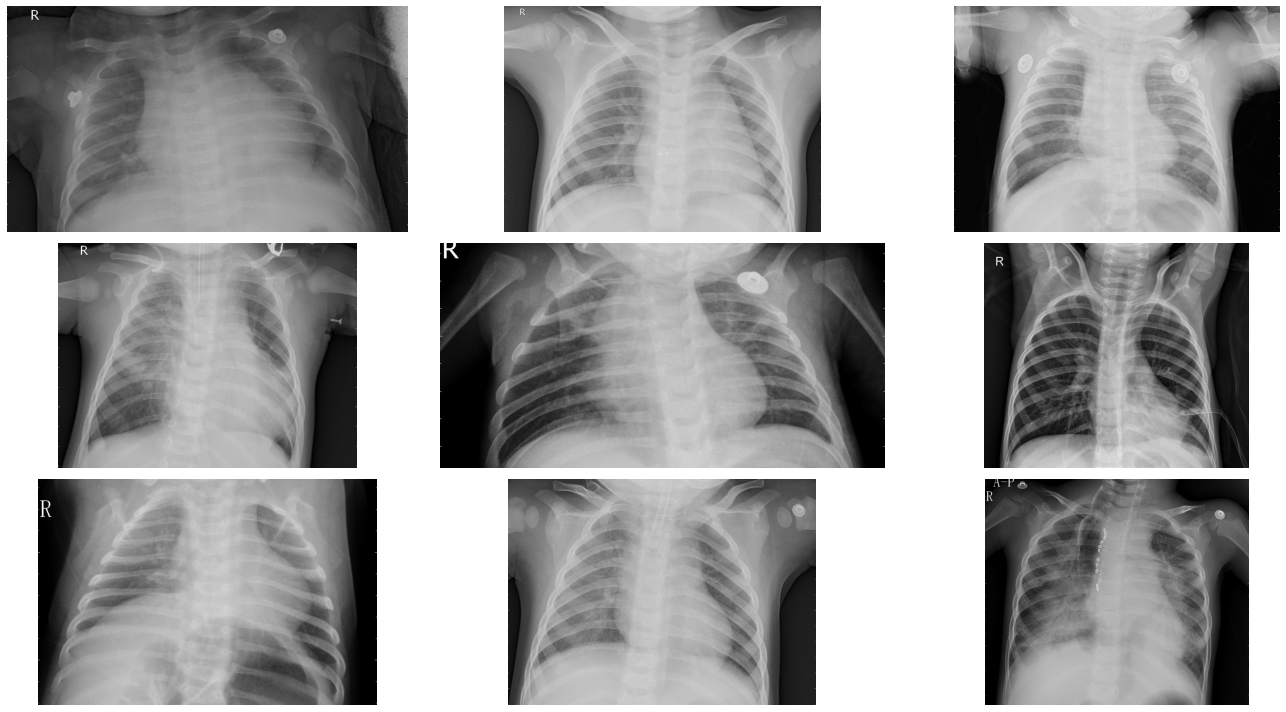

In [ ]:
plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

The dimensions of the image are 672 pixels width and 1192 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 99.0004 and the standard deviation is 44.0949


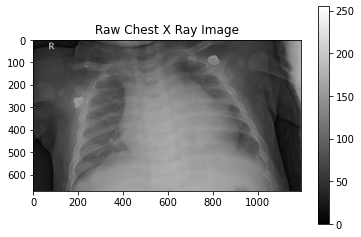

In [ ]:
predict_img = pneumonia[0]
sample_img = plt.imread(os.path.join(pneumonia_dir, predict_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

### Normal

The dimensions of the image are 2129 pixels width and 2202 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 120.5869 and the standard deviation is 65.6846


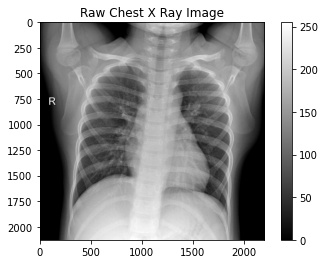

In [ ]:
normal_img = normal[0]
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

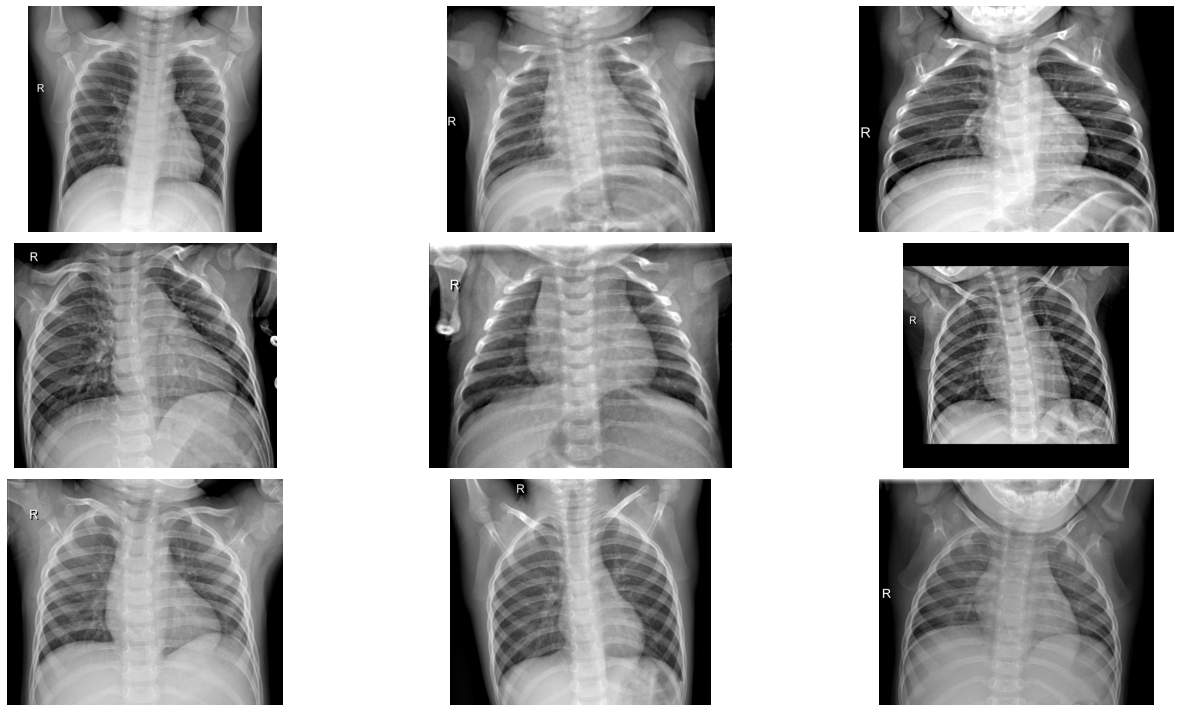

In [ ]:
plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

### Ivestigate pixel value distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixels in Image')

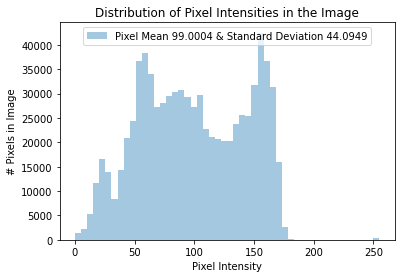

In [ ]:
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

### Imbalanced Data

The most popular approaches are as follows:


*   Weighted Class Approach
*   Under-sampling approach
*   Data Augmentation for Minority Class
*   Synthetic Minority Over-sampling Technique (SMOTE)







### Data Augmentation
Keras ImageDataGenerator function to perform data preprocessing and data augmentation.

We also use the generator to transform the values in each batch so that their mean is 0 and their standard deviation is 1.
The generator also converts our single channel X-ray images (gray-scale) to a three-channel format by repeating the values in the image across all channels (we will want this because the pre-trained model that we'll use requires three-channel inputs).

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

### Build generator

The generator we wrote normalizes each image per batch, meaning thatit uses batch statistics.
We should not do this with the test and validation data, since in a real life scenario we don't process incoming images a batch at a time (we process one image at a time).
Knowing the average per batch of test data would effectively give our model an advantage (The model should not have any information about the test data).
What we need to do is to normalize incomming test data using the statistics computed from the training set.

In [42]:
train = image_generator.flow_from_directory(train_dir, 
                                            subset='training',
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=1,
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 180 pixels width and 180 pixels height, one single color channel.
The maximum pixel value is 3.4272 and the minimum is -2.6466
The mean value of the pixels is -0.0000 and the standard deviation is 1.0000


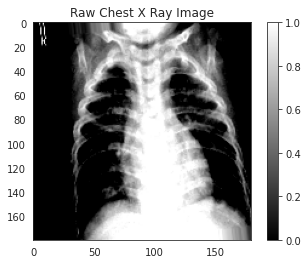

In [43]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixels in Image')

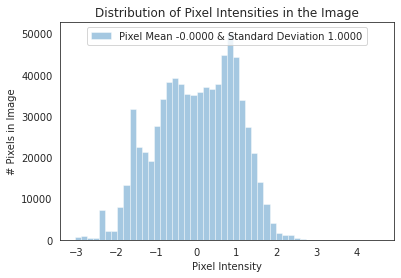

In [ ]:
sns.distplot(generated_image.ravel(),
            label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

#### Weighted Class Approach

In [ ]:
# from collections import Counter

# counter = Counter(train.classes) 
# print(f"counter : {counter}")
# max_val = float(max(counter.values()))
# print(f"max val : {max_val}")
# class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}                     
# print(f"class_weights : {class_weights}")

counter : Counter({1: 3875, 0: 1341})
max val : 3875.0
class_weights : {0: 2.889634601043997, 1: 1.0}


#### Read data

In [ ]:
# from sklearn.model_selection import train_test_split
# from tensorflow.keras import utils
# import cv2


# def load_data(train_dir:str):
#     images = []
#     labels = []
#     size = 180,180
#     index = -1
#     for folder in [os.path.join(train_dir, 'NORMAL'), os.path.join(train_dir, 'PNEUMONIA')]:
#         index +=1
#         for image in os.listdir(folder):
#           try:
#             temp_img = cv2.imread(os.path.join(folder,image))
#             temp_img = cv2.resize(temp_img, size)
#             images.append(temp_img)
#             labels.append(index)
#           except Exception:
#             continue  
    
#     images = np.array(images)
#     images = images.astype('float32')/255.0
#     labels = utils.to_categorical(labels)
#     x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1, random_state = 0)
    
#     print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
#     print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)
#     return x_train, x_test, y_train, y_test

### Synthetic Minority Over-sampling Technique (SMOTE) <br>
By definition SMOTE is an oversampling technique that generates synthetic samples from the minority class. It is used to obtain a synthetically class-balanced or nearly class-balanced training set, which is then used to train the classifier. SMOTE actually performs better than simple oversampling, but although it is not quite popular with images as much as its popularity when dealing with structured data

In [ ]:
#x_train, x_test, y_train, y_test = load_data(train_dir)

Loaded 4694 images for training, Train data shape = (4694, 180, 180, 3)
Loaded 522 images for testing Test data shape = (522, 180, 180, 3)


In [ ]:
# from imblearn.over_sampling import SMOTE
# X_resampled, y_resampled = SMOTE().fit_resample(x_train, y_train)

### Random Under-Sampling
Random under-sampling randomly picks data points from the majority class. After the sampling, the majority class should have the same number of data points as the minority class.

In [ ]:
#x_train, x_test, y_train, y_test = load_data(train_dir)

In [ ]:
#Random Under-Sampling
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler()
# X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

### Building a CNN model


#### First Custom CNN Model

In [18]:
model_path="/content/drive/MyDrive/AIDL/first_custome_cnn_model_per.h5"

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy',
                      tf.keras.metrics.Precision(name='precision'),
                      tf.keras.metrics.Recall(name='recall')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 178, 178, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 176, 176, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 176, 176, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 86, 86, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 86, 86, 64)        2

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

save_model = ModelCheckpoint(model_path, save_best_only=True)

In [ ]:
r = model.fit(
    train, 
    epochs=50,
    validation_data=validation, 
    #class_weight=class_weights,
    shuffle = True,
    steps_per_epoch=100,
    callbacks=[save_model]
)

#### Model metrics

Text(0.5, 1.0, 'Accuracy Evolution')

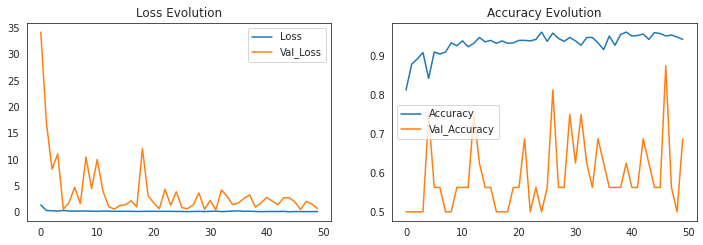

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

Text(0.5, 1.0, 'Recall Evolution')

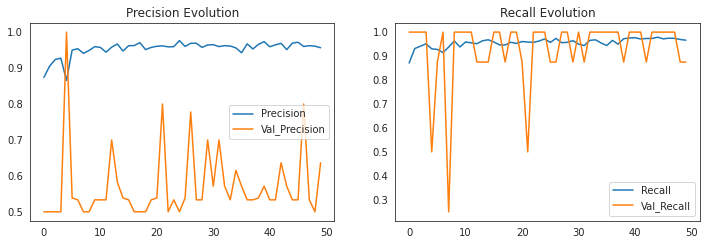

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['precision'], label='Precision')
plt.plot(r.history['val_precision'], label='Val_Precision')
plt.legend()
plt.title('Precision Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['recall'], label='Recall')
plt.plot(r.history['val_recall'], label='Val_Recall')
plt.legend()
plt.title('Recall Evolution')

#### Model evaluation

In [33]:
# Model loading
model = tf.keras.models.load_model(model_path)

In [ ]:
loss, acc, prec, rec  = model.evaluate(test)
print(f"Test Accuracy: {acc}%")
print(f"Test Loss: {loss}%")
print(f"Test Precision: {prec}%")
print(f"Test Recall: {rec}%")



loss, acc, prec, rec  = model.evaluate(train)
print(f"Train Accuracy: {acc}%")
print(f"Train Loss: {loss}%")
print(f"Train Precision: {prec}%")
print(f"Train Recall: {rec}%")


#### Classification Report

[[133 101]
 [ 22 368]]


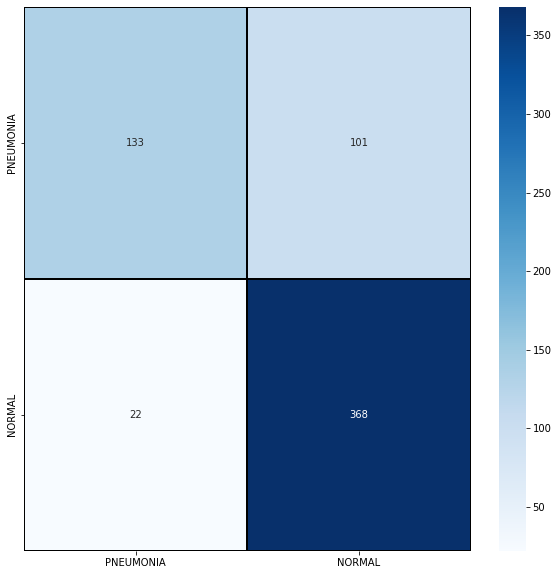

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)
cm = confusion_matrix(test.classes, pred > 0.5)
print(cm)
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))
plt.figure(figsize = (10,10))
labels = ['PNEUMONIA', 'NORMAL']
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [24]:

cm = confusion_matrix(test.classes, pred > 0.7)
print(cm)
pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True))

[[178  56]
 [ 56 334]]


,0,1,accuracy,macro avg,weighted avg
precision,0.760684,0.85641,0.820513,0.808547,0.820513
recall,0.760684,0.85641,0.820513,0.808547,0.820513
f1-score,0.760684,0.85641,0.820513,0.808547,0.820513
support,234.000000,390.00000,0.820513,624.000000,624.000000


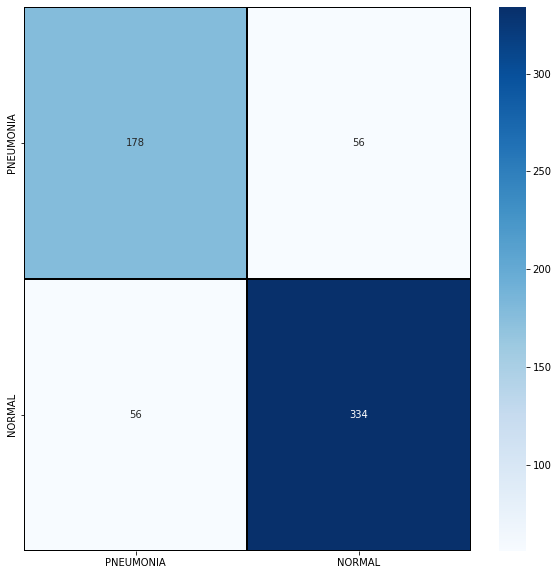

In [23]:
plt.figure(figsize = (10,10))
labels = ['PNEUMONIA', 'NORMAL']
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

#### Second Custom CNN Model

In [35]:
model_path="/content/drive/MyDrive/AIDL/second_custom_cnn_model.h5"

In [ ]:
keras.backend.clear_session()

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , activation = 'relu' , input_shape = (180,180,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 ))
model.add(Conv2D(64 , (3,3) , strides = 1 , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 ))
model.add(Conv2D(64 , (3,3) , strides = 1  , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 ))
model.add(Conv2D(128 , (3,3) , strides = 1 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 ,))
model.add(Conv2D(256 , (3,3) , strides = 1 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , ))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy',
                      tf.keras.metrics.Precision(name='precision'),
                      tf.keras.metrics.Recall(name='recall')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 178, 178, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 87, 87, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 87, 87, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0

In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint

save_model = ModelCheckpoint(model_path, save_best_only=True)

In [ ]:
r = model.fit(
    train, 
    epochs=50,
    validation_data=validation, 
    #class_weight=class_weights,
    shuffle = True,
    steps_per_epoch=100,
    callbacks=[save_model]
)

#### Model metrics

Text(0.5, 1.0, 'Recall Evolution')

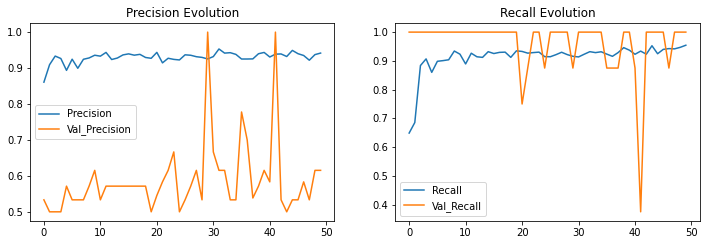

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['precision'], label='Precision')
plt.plot(r.history['val_precision'], label='Val_Precision')
plt.legend()
plt.title('Precision Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['recall'], label='Recall')
plt.plot(r.history['val_recall'], label='Val_Recall')
plt.legend()
plt.title('Recall Evolution')

Text(0.5, 1.0, 'Accuracy Evolution')

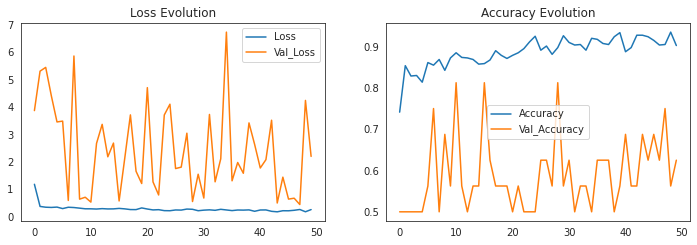

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

#### Model Evaluation

In [37]:
model = tf.keras.models.load_model(model_path)

In [ ]:
loss, acc, prec, rec  = model.evaluate(test)
print(f"Test Accuracy: {acc}%")
print(f"Test Loss: {loss}%")
print(f"Test Precision: {prec}%")
print(f"Test Recall: {rec}%")



loss, acc, prec, rec  = model.evaluate(train)
print(f"Train Accuracy: {acc}%")
print(f"Train Loss: {loss}%")
print(f"Train Precision: {prec}%")
print(f"Train Recall: {rec}%")

#### Classification Report

[[161  73]
 [ 58 332]]


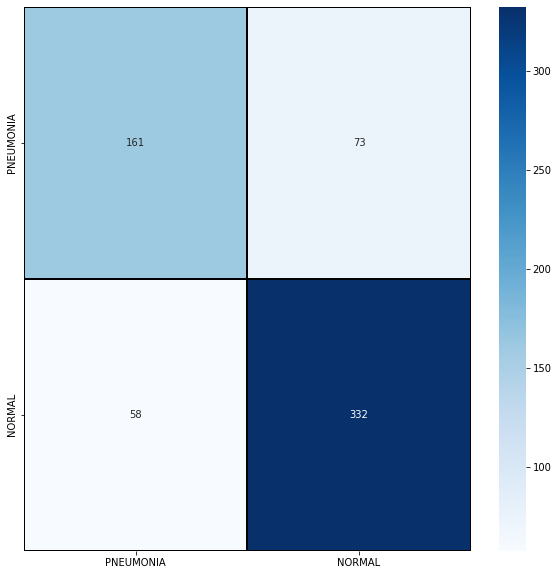

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)
cm = confusion_matrix(test.classes, pred > 0.5)
print(cm)
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))
plt.figure(figsize = (10,10))
labels = ['PNEUMONIA', 'NORMAL']
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

[[220  14]
 [161 229]]


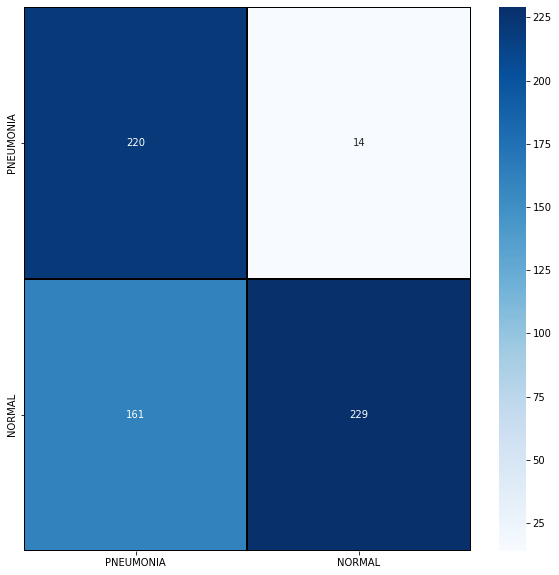

In [ ]:
cm = confusion_matrix(test.classes, pred > 0.7)
print(cm)
pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True))
plt.figure(figsize = (10,10))
labels = ['PNEUMONIA', 'NORMAL']
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

[[225   9]
 [209 181]]


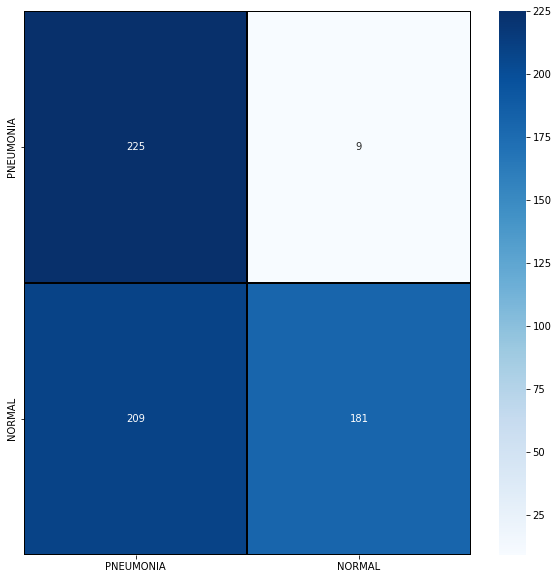

In [ ]:
cm = confusion_matrix(test.classes, pred > 0.80)
print(cm)
pd.DataFrame(classification_report(test.classes, pred > 0.80, output_dict=True))
plt.figure(figsize = (10,10))
labels = ['PNEUMONIA', 'NORMAL']
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

### Transfer Learning


#### DenseNet
Densenet is a convolutional network where each layer is connected to all other layers that are deeper in the network:

* The first layer is connected to the 2nd, 3rd, 4th etc.
* The second layer is conected to the 3rd, 4th, 5th etc.

for more information about the DenseNet Architecture visit this website : https://keras.io/api/applications/densenet/


In [39]:
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

base_model = DenseNet121(input_shape=(180, 180, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

29089792/29084464 [==============================] - 0s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 186, 186, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 90, 90, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 90, 90, 64)   256         conv1/conv[0][0]                 
_______________________

In [ ]:
layers = base_model.layers
print(f"The model has {len(layers)} layers")

The model has 428 layers


In [ ]:
print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")

The input shape KerasTensor(type_spec=TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
The output shape KerasTensor(type_spec=TensorSpec(shape=(None, 1024), dtype=tf.float32, name=None), name='avg_pool/Mean:0', description="created by layer 'avg_pool'")


In [9]:
model_path="/content/drive/MyDrive/AIDL/DenseNet121_cnn_model_class_weights.h5"

In [ ]:
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy',
                      tf.keras.metrics.Precision(name='precision'),
                      tf.keras.metrics.Recall(name='recall')])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

save_model = ModelCheckpoint(model_path, save_best_only=True)
r = model.fit(
    train, 
    epochs=50,
    validation_data=validation, 
    #class_weight=class_weights,
    shuffle = True,
    steps_per_epoch=100,
    callbacks=[save_model]
)

Epoch 1/50
100/100 [==============================] - 393s 4s/step - loss: 0.6130 - accuracy: 0.8400 - precision: 0.9491 - recall: 0.8328 - val_loss: 3.6831 - val_accuracy: 0.4375 - val_precision: 0.4444 - val_recall: 0.5000
Epoch 2/50
100/100 [==============================] - 426s 4s/step - loss: 0.4023 - accuracy: 0.8700 - precision: 0.9607 - recall: 0.8610 - val_loss: 3.0398 - val_accuracy: 0.6250 - val_precision: 1.0000 - val_recall: 0.2500
Epoch 3/50
100/100 [==============================] - 432s 4s/step - loss: 0.4930 - accuracy: 0.8537 - precision: 0.9546 - recall: 0.8445 - val_loss: 1.7903 - val_accuracy: 0.6250 - val_precision: 0.7500 - val_recall: 0.3750
Epoch 4/50
100/100 [==============================] - 425s 4s/step - loss: 0.3573 - accuracy: 0.9075 - precision: 0.9728 - recall: 0.9008 - val_loss: 3.5034 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/50
100/100 [==============================] - 418s 4s/step - loss: 0.4306 - accuracy

#### Model Metrics

Text(0.5, 1.0, 'Recall Evolution')

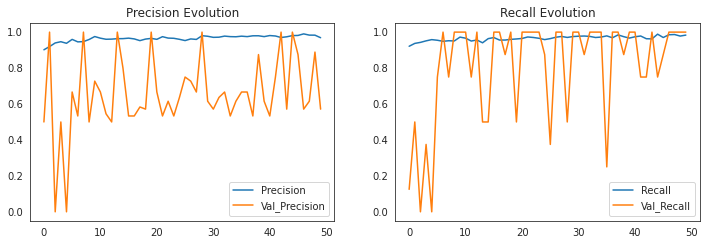

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['precision'], label='Precision')
plt.plot(r.history['val_precision'], label='Val_Precision')
plt.legend()
plt.title('Precision Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['recall'], label='Recall')
plt.plot(r.history['val_recall'], label='Val_Recall')
plt.legend()
plt.title('Recall Evolution')

Text(0.5, 1.0, 'Accuracy Evolution')

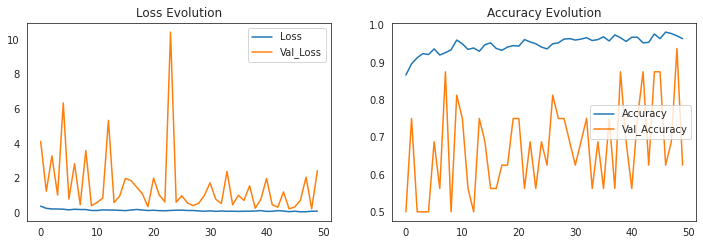

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [10]:
model = tf.keras.models.load_model(model_path)

#### Model Evaluation

In [ ]:
loss, acc, prec, rec  = model.evaluate(test)
print(f"Test Accuracy: {acc}%")
print(f"Test Loss: {loss}%")
print(f"Test Precision: {prec}%")
print(f"Test Recall: {rec}%")



loss, acc, prec, rec  = model.evaluate(train)
print(f"Train Accuracy: {acc}%")
print(f"Train Loss: {loss}%")
print(f"Train Precision: {prec}%")
print(f"Train Recall: {rec}%")

#### Classification Report

[[199  35]
 [ 40 350]]
                    0           1  accuracy   macro avg  weighted avg
precision    0.832636    0.909091  0.879808    0.870863      0.880420
recall       0.850427    0.897436  0.879808    0.873932      0.879808
f1-score     0.841438    0.903226  0.879808    0.872332      0.880055
support    234.000000  390.000000  0.879808  624.000000    624.000000


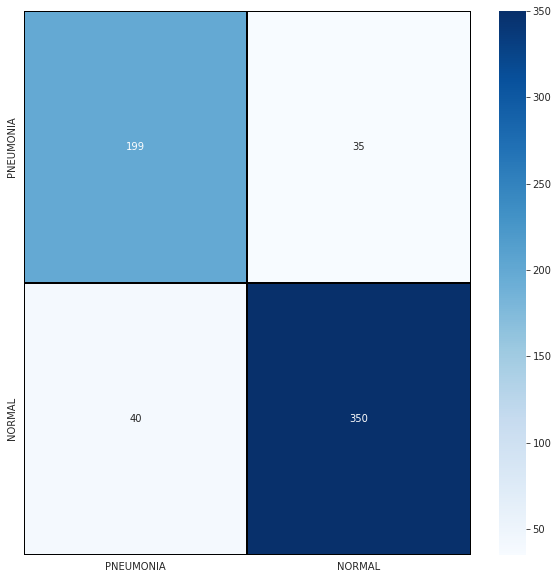

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)
cm = confusion_matrix(test.classes, pred > 0.5)
print(cm)
print(pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True)))
plt.figure(figsize = (10,10))
labels = ['PNEUMONIA', 'NORMAL']
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

[[207  27]
 [ 51 339]]
                    0           1  accuracy   macro avg  weighted avg
precision    0.802326    0.926230     0.875    0.864278      0.879766
recall       0.884615    0.869231     0.875    0.876923      0.875000
f1-score     0.841463    0.896825     0.875    0.869144      0.876065
support    234.000000  390.000000     0.875  624.000000    624.000000


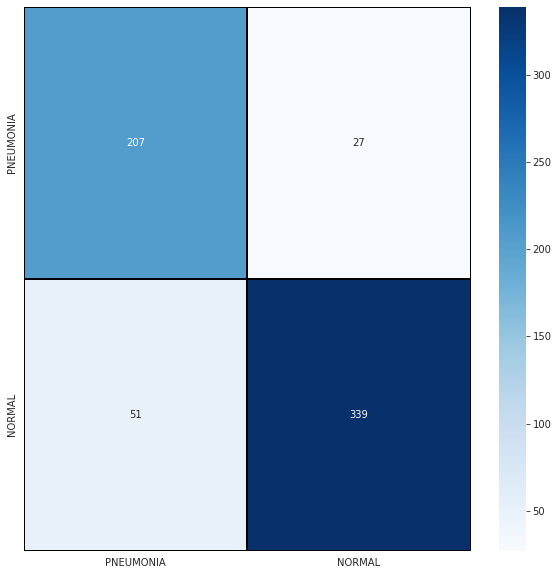

In [ ]:
cm = confusion_matrix(test.classes, pred > 0.7)
print(cm)
print(pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True)))
plt.figure(figsize = (10,10))
labels = ['PNEUMONIA', 'NORMAL']
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

[[210  24]
 [ 57 333]]
                    0           1  accuracy   macro avg  weighted avg
precision    0.786517    0.932773  0.870192    0.859645      0.877927
recall       0.897436    0.853846  0.870192    0.875641      0.870192
f1-score     0.838323    0.891566  0.870192    0.864945      0.871600
support    234.000000  390.000000  0.870192  624.000000    624.000000


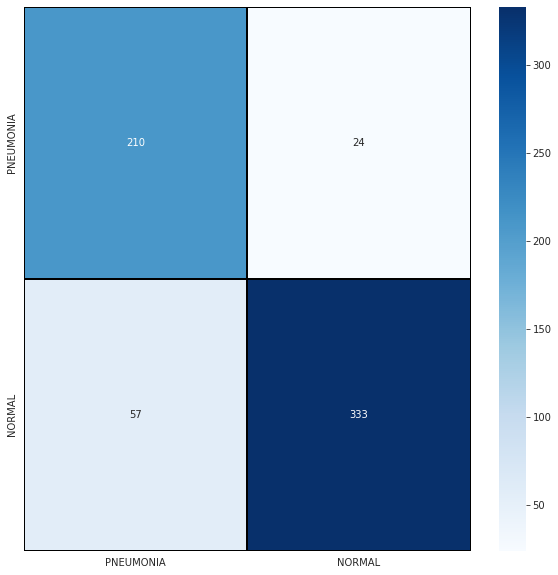

In [ ]:
cm = confusion_matrix(test.classes, pred > 0.8)
print(cm)
print(pd.DataFrame(classification_report(test.classes, pred > 0.8, output_dict=True)))
plt.figure(figsize = (10,10))
labels = ['PNEUMONIA', 'NORMAL']
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

#### VGG16
VGG16 has a very simple and classical architecture, with blocks of 2 or 3 convolutional layers followed by a pooling layer, plus a final dense network composed of 2 hidden layers (of 4096 nodes each) and one output layer (of 1000 nodes). Only 3x3 filters are used.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16


vgg16_base_model = VGG16(input_shape=(180,180,3),include_top=False,weights='imagenet')

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
model_path="/content/drive/MyDrive/AIDL/vgg16_cnn_model.h5"

In [ ]:
vgg16_base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

In [ ]:
    vgg16_model = tf.keras.Sequential([
        vgg16_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

In [ ]:
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    vgg16_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

save_model = ModelCheckpoint(model_path, save_best_only=True)
r = vgg16_model.fit(
    train, 
    epochs=50,
    validation_data=validation, 
    # class_weight=class_weight,
    shuffle = True,
    steps_per_epoch=100,
    callbacks=[save_model]
)

Epoch 1/50
100/100 [==============================] - 18s 182ms/step - loss: 0.8057 - accuracy: 0.6012 - precision: 0.7912 - recall: 0.6164 - val_loss: 7.4083 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
100/100 [==============================] - 24s 237ms/step - loss: 0.5802 - accuracy: 0.7188 - precision: 0.8206 - recall: 0.7884 - val_loss: 5.5369 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
100/100 [==============================] - 19s 190ms/step - loss: 0.4418 - accuracy: 0.7975 - precision: 0.8754 - recall: 0.8425 - val_loss: 4.4874 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/50
100/100 [==============================] - 19s 187ms/step - loss: 0.4917 - accuracy: 0.7750 - precision: 0.8613 - recall: 0.8386 - val_loss: 1.2533 - val_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 5/50
100/100 [==============================] - 19s 189ms/step - loss: 0.4374 

#### Model Metrics

Text(0.5, 1.0, 'Recall Evolution')

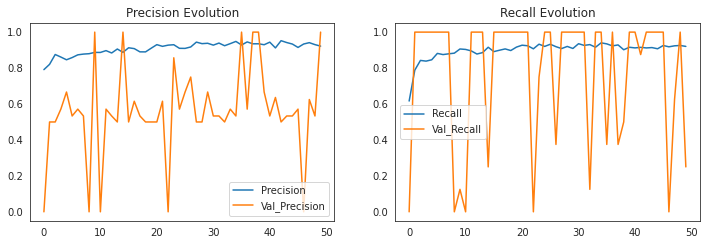

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['precision'], label='Precision')
plt.plot(r.history['val_precision'], label='Val_Precision')
plt.legend()
plt.title('Precision Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['recall'], label='Recall')
plt.plot(r.history['val_recall'], label='Val_Recall')
plt.legend()
plt.title('Recall Evolution')

Text(0.5, 1.0, 'Accuracy Evolution')

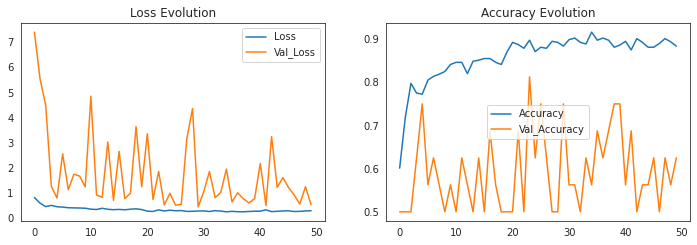

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
model = tf.keras.models.load_model(model_path)

#### Model Evaluation

In [ ]:
loss, acc, prec, rec  = model.evaluate(test)
print(f"Test Accuracy: {acc}%")
print(f"Test Loss: {loss}%")
print(f"Test Precision: {prec}%")
print(f"Test Recall: {rec}%")



loss, acc, prec, rec  = model.evaluate(train)
print(f"Train Accuracy: {acc}%")
print(f"Train Loss: {loss}%")
print(f"Train Precision: {prec}%")
print(f"Train Recall: {rec}%")

624/624 [==============================] - 13s 20ms/step - loss: 0.4342 - accuracy: 0.8029 - precision: 0.7883 - recall: 0.9359
Test Accuracy: 0.8028846383094788%
Test Loss: 0.43423864245414734%
Test Precision: 0.7883369326591492%
Test Recall: 0.9358974099159241%
652/652 [==============================] - 93s 143ms/step - loss: 0.2204 - accuracy: 0.9231 - precision: 0.9707 - recall: 0.9244
Train Accuracy: 0.9231211543083191%
Train Loss: 0.22039633989334106%
Train Precision: 0.9707317352294922%
Train Recall: 0.9243870973587036%


#### Classification Report

[[137  97]
 [ 25 365]]
                    0           1  accuracy   macro avg  weighted avg
precision    0.845679    0.790043  0.804487    0.817861      0.810907
recall       0.585470    0.935897  0.804487    0.760684      0.804487
f1-score     0.691919    0.856808  0.804487    0.774363      0.794974
support    234.000000  390.000000  0.804487  624.000000    624.000000


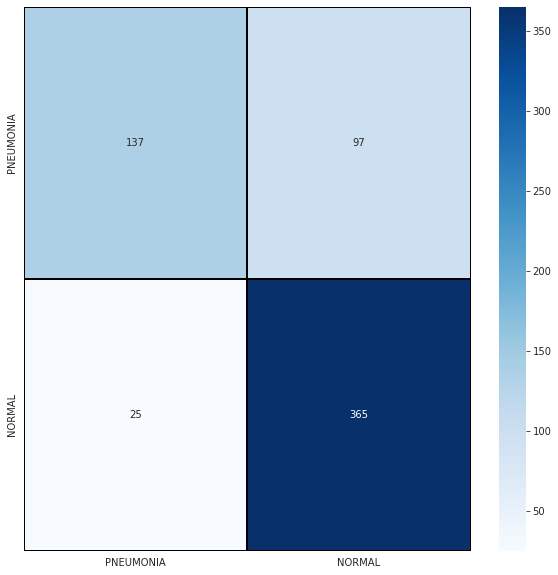

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)
cm = confusion_matrix(test.classes, pred > 0.5)
print(cm)
print(pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True)))
plt.figure(figsize = (10,10))
labels = ['PNEUMONIA', 'NORMAL']
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

[[188  46]
 [ 62 328]]
                    0           1  accuracy   macro avg  weighted avg
precision    0.752000    0.877005  0.826923    0.814503      0.830128
recall       0.803419    0.841026  0.826923    0.822222      0.826923
f1-score     0.776860    0.858639  0.826923    0.817749      0.827972
support    234.000000  390.000000  0.826923  624.000000    624.000000


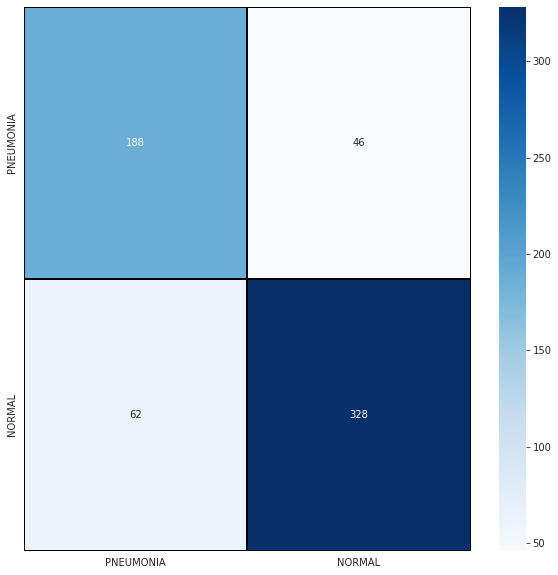

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)
cm = confusion_matrix(test.classes, pred > 0.7)
print(cm)
print(pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True)))
plt.figure(figsize = (10,10))
labels = ['PNEUMONIA', 'NORMAL']
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

[[198  36]
 [ 83 307]]
                    0           1  accuracy   macro avg  weighted avg
precision    0.704626    0.895044  0.809295    0.799835      0.823637
recall       0.846154    0.787179  0.809295    0.816667      0.809295
f1-score     0.768932    0.837653  0.809295    0.803293      0.811883
support    234.000000  390.000000  0.809295  624.000000    624.000000


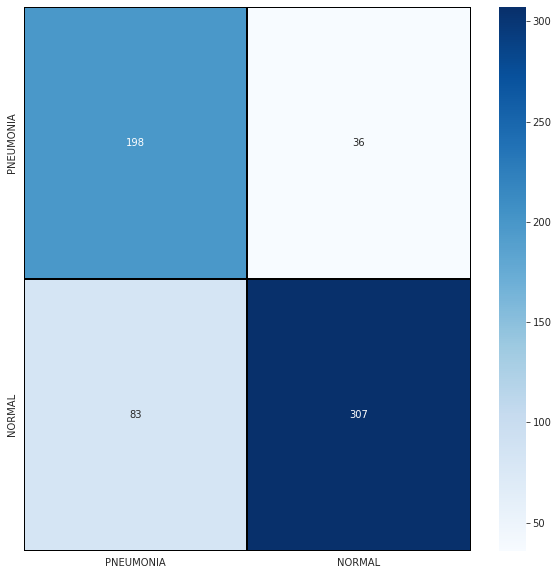

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)
cm = confusion_matrix(test.classes, pred > 0.8)
print(cm)
print(pd.DataFrame(classification_report(test.classes, pred > 0.8, output_dict=True)))
plt.figure(figsize = (10,10))
labels = ['PNEUMONIA', 'NORMAL']
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

#### ResNet

See the full explanation and schemes in the Research Paper on Deep Residual Learning (https://arxiv.org/pdf/1512.03385.pdf)

In [ ]:
from tensorflow.keras.applications import ResNet50

resnet_base_model = ResNet50(input_shape=(180,180,3), include_top=False, weights='imagenet')

94773248/94765736 [==============================] - 3s 0us/step


In [12]:
model_path="/content/drive/MyDrive/AIDL/ResNet50_cnn_model.h5"

In [ ]:
resnet_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 186, 186, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 90, 90, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 90, 90, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
    resnet_model = tf.keras.Sequential([
        resnet_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    resnet_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

save_model = ModelCheckpoint(model_path, save_best_only=True)
r = resnet_model.fit(
    train, 
    epochs=50,
    validation_data=validation, 
    # class_weight=class_weight,
    shuffle = True,
    steps_per_epoch=100,
    callbacks=[save_model]
)


Epoch 1/50
100/100 [==============================] - 24s 241ms/step - loss: 0.7508 - accuracy: 0.6300 - precision: 0.7793 - recall: 0.6794 - val_loss: 0.8926 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/50
100/100 [==============================] - 27s 270ms/step - loss: 0.6063 - accuracy: 0.7212 - precision: 0.8503 - recall: 0.7641 - val_loss: 1.2034 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/50
100/100 [==============================] - 22s 222ms/step - loss: 0.4563 - accuracy: 0.8213 - precision: 0.8778 - recall: 0.8763 - val_loss: 1.5462 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/50
100/100 [==============================] - 28s 279ms/step - loss: 0.3929 - accuracy: 0.8325 - precision: 0.8861 - recall: 0.8861 - val_loss: 2.0819 - val_accuracy: 0.3125 - val_precision: 0.2000 - val_recall: 0.1250
Epoch 5/50
100/100 [==============================] - 24s 236ms/step - loss: 0.4090 - accura

#### Model Metrics

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['precision'], label='Precision')
plt.plot(r.history['val_precision'], label='Val_Precision')
plt.legend()
plt.title('Precision Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['recall'], label='Recall')
plt.plot(r.history['val_recall'], label='Val_Recall')
plt.legend()
plt.title('Recall Evolution')

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [44]:
model = tf.keras.models.load_model(model_path)

#### Model Evaluation

In [ ]:
loss, acc, prec, rec  = model.evaluate(test)
print(f"Test Accuracy: {acc}%")
print(f"Test Loss: {loss}%")
print(f"Test Precision: {prec}%")
print(f"Test Recall: {rec}%")



loss, acc, prec, rec  = model.evaluate(train)
print(f"Train Accuracy: {acc}%")
print(f"Train Loss: {loss}%")
print(f"Train Precision: {prec}%")
print(f"Train Recall: {rec}%")

#### Classification Report

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)
cm = confusion_matrix(test.classes, pred > 0.5)
print(cm)
print(pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True)))
plt.figure(figsize = (10,10))
labels = ['PNEUMONIA', 'NORMAL']
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)
cm = confusion_matrix(test.classes, pred > 0.7)
print(cm)
print(pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True)))
plt.figure(figsize = (10,10))
labels = ['PNEUMONIA', 'NORMAL']
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)
cm = confusion_matrix(test.classes, pred > 0.8)
print(cm)
print(pd.DataFrame(classification_report(test.classes, pred > 0.8, output_dict=True)))
plt.figure(figsize = (10,10))
labels = ['PNEUMONIA', 'NORMAL']
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

#### InceptionNet
Also known as GoogleNet, this architecture presents sub-networks called inception modules, which allows fast training computing, complex patterns detection, and optimal use of parameters

for more information visit https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/43022.pdf



In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D

inception_base_model = InceptionV3(input_shape=(180,180,3),include_top=False,weights='imagenet')

model_path="/content/drive/MyDrive/AIDL/inception_cnn_model.h5"

In [ ]:
    inception_model = tf.keras.Sequential([
        inception_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    inception_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

save_model = ModelCheckpoint(model_path, save_best_only=True)
r = inception_model.fit(
    train, 
    epochs=50,
    validation_data=validation, 
    # class_weight=class_weight,
    shuffle = True,
    steps_per_epoch=100,
    callbacks=[save_model]
)


Epoch 1/50
100/100 [==============================] - 23s 229ms/step - loss: 0.7425 - accuracy: 0.6212 - precision: 0.8074 - recall: 0.6534 - val_loss: 237.0869 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
100/100 [==============================] - 20s 196ms/step - loss: 0.6102 - accuracy: 0.7075 - precision: 0.8053 - recall: 0.7887 - val_loss: 2.2639 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
100/100 [==============================] - 16s 161ms/step - loss: 0.4075 - accuracy: 0.8438 - precision: 0.8995 - recall: 0.8889 - val_loss: 24.9187 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/50
100/100 [==============================] - 16s 156ms/step - loss: 0.4516 - accuracy: 0.8037 - precision: 0.8693 - recall: 0.8736 - val_loss: 386.7119 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/50
100/100 [==============================] - 15s 153ms/step - 

#### Model Metrics

Text(0.5, 1.0, 'Accuracy Evolution')

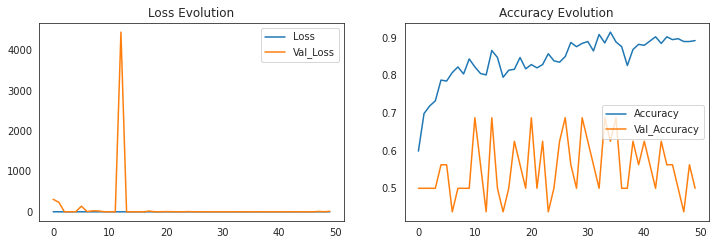

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

Text(0.5, 1.0, 'Recall Evolution')

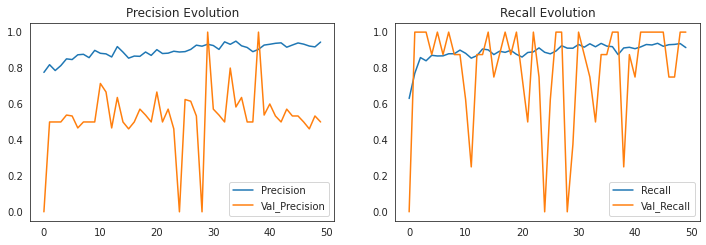

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['precision'], label='Precision')
plt.plot(r.history['val_precision'], label='Val_Precision')
plt.legend()
plt.title('Precision Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['recall'], label='Recall')
plt.plot(r.history['val_recall'], label='Val_Recall')
plt.legend()
plt.title('Recall Evolution')

#### Model Evaluation 

In [ ]:
model = tf.keras.models.load_model(model_path)

In [ ]:
loss, acc, prec, rec  = model.evaluate(test)
print(f"Test Accuracy: {acc}%")
print(f"Test Loss: {loss}%")
print(f"Test Precision: {prec}%")
print(f"Test Recall: {rec}%")



loss, acc, prec, rec  = model.evaluate(train)
print(f"Train Accuracy: {acc}%")
print(f"Train Loss: {loss}%")
print(f"Train Precision: {prec}%")
print(f"Train Recall: {rec}%")

624/624 [==============================] - 15s 25ms/step - loss: 0.4614 - accuracy: 0.7676 - precision: 0.9125 - recall: 0.6949
Test Accuracy: 0.7676281929016113%
Test Loss: 0.46136125922203064%
Test Precision: 0.9124578833580017%
Test Recall: 0.6948717832565308%
652/652 [==============================] - 91s 140ms/step - loss: 0.4680 - accuracy: 0.7546 - precision: 0.9966 - recall: 0.6720
Train Accuracy: 0.754601240158081%
Train Loss: 0.46800291538238525%
Train Precision: 0.9965556859970093%
Train Recall: 0.671999990940094%


#### Classification Report

[[215  19]
 [112 278]]
                    0           1  accuracy   macro avg  weighted avg
precision    0.657492    0.936027  0.790064    0.796760      0.831576
recall       0.918803    0.712821  0.790064    0.815812      0.790064
f1-score     0.766488    0.809316  0.790064    0.787902      0.793256
support    234.000000  390.000000  0.790064  624.000000    624.000000


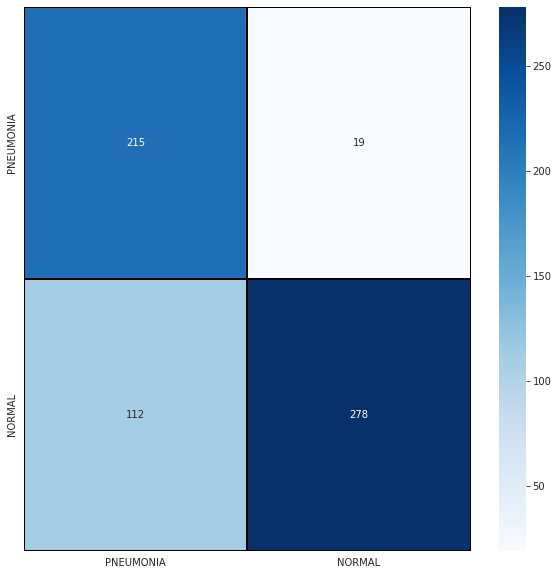

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)
cm = confusion_matrix(test.classes, pred > 0.5)
print(cm)
print(pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True)))
plt.figure(figsize = (10,10))
labels = ['PNEUMONIA', 'NORMAL']
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

[[225   9]
 [158 232]]
                    0           1  accuracy   macro avg  weighted avg
precision    0.587467    0.962656  0.732372    0.775061      0.821960
recall       0.961538    0.594872  0.732372    0.778205      0.732372
f1-score     0.729335    0.735341  0.732372    0.732338      0.733089
support    234.000000  390.000000  0.732372  624.000000    624.000000


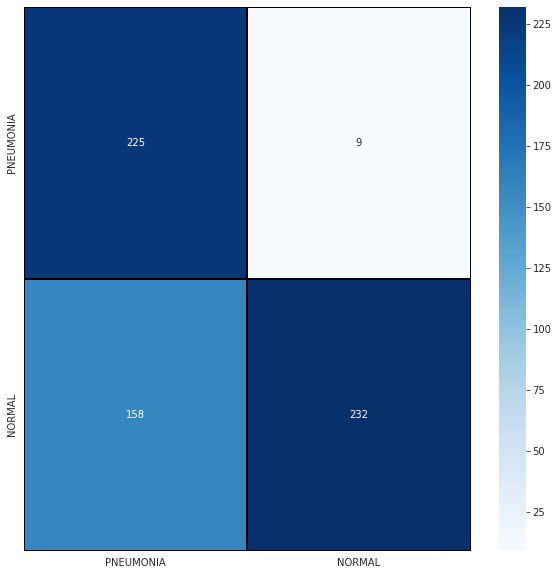

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)
cm = confusion_matrix(test.classes, pred > 0.7)
print(cm)
print(pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True)))
plt.figure(figsize = (10,10))
labels = ['PNEUMONIA', 'NORMAL']
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

[[195  39]
 [ 78 312]]
                    0           1  accuracy   macro avg  weighted avg
precision    0.714286    0.888889    0.8125    0.801587      0.823413
recall       0.833333    0.800000    0.8125    0.816667      0.812500
f1-score     0.769231    0.842105    0.8125    0.805668      0.814777
support    234.000000  390.000000    0.8125  624.000000    624.000000


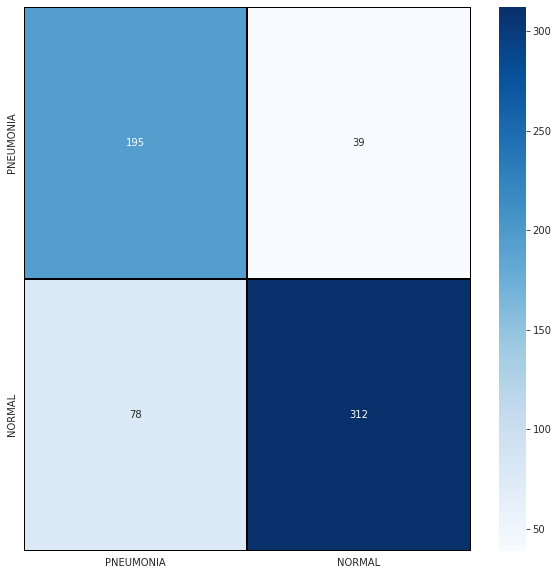

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)
cm = confusion_matrix(test.classes, pred > 0.4)
print(cm)
print(pd.DataFrame(classification_report(test.classes, pred > 0.4, output_dict=True)))
plt.figure(figsize = (10,10))
labels = ['PNEUMONIA', 'NORMAL']
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

### Results

<table>
  <tr>
    <th>DL Approach</th>
    <th>F1-score</th>
    <th>Precision</th>
    <th>Recall</th>  
  </tr>
  <tr>
    <td>First Custom CNN</td>
    <td>0.85</td>
    <td>0.78</td>
    <td>0.94</td>
  </tr>
       <tr>
   </tr>
  <tr>
    <td>First Custom CNN weight class</td>
    <td>0.84</td>
    <td>0.90</td>
    <td>0.79</td>
  </tr>

  <tr>
    <td>First Custom CNN smote</td>
    <td>0.80</td>
    <td>0.89</td>
    <td>0.74</td>
  </tr>
  <tr>
   </tr>
      <tr>
    <td>First Custom CNN under-sampling</td>
    <td>0.75</td>
    <td>0.80</td>
    <td>0.71</td>
  </tr>
    <tr>
    <td>Second Custom CNN</td>
    <td>0.84</td>
    <td>0.90</td>
    <td>0.79</td>
  </tr>
       <tr>
   </tr>
  <tr>
    <td>Second Custom CNN weight class</td>
    <td>0.80</td>
    <td>0.87</td>
    <td>0.75</td>
  </tr>

  <tr>
    <td>Second Custom CNN smote</td>
    <td>0.80</td>
    <td>0.89</td>
    <td>0.74</td>
  </tr>
  <tr>
   </tr>
      <tr>
    <td>Second Custom CNN under-sampling</td>
    <td>0.79</td>
    <td>0.83</td>
    <td>0.77</td>
  </tr>
  <tr>
    <td>DenseNet121 weight class</td>
    <td>0.91</td>
    <td>0.90</td>
    <td>0.91</td>
  </tr>
    <tr>
    <td>DenseNet121</td>
    <td>0.92</td>
    <td>0.91</td>
    <td>0.94</td>
  </tr>
    </tr>
    <tr>
    <td>DenseNet121 with smote</td>
    <td>0.84</td>
    <td>0.91</td>
    <td>0.79</td>
  </tr>
  <tr>
   </tr>
    <tr>
    <td>InseptionNet</td>
    <td>0.78</td>
    <td>0.91</td>
    <td>0.69</td>
  </tr>

  <tr>
    <td>ResNet50</td>
    <td>0.88</td>
    <td>0.87</td>
    <td>0.90</td>
  </tr>
           <tr>
   </tr>
    <tr>
    <td>VGG</td>
    <td>0.85</td>
    <td>0.78</td>
    <td>0.93</td>